In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google.colab'

In [3]:
diabetes= pd.read_csv('diabetes.csv')

# Feature Engineering

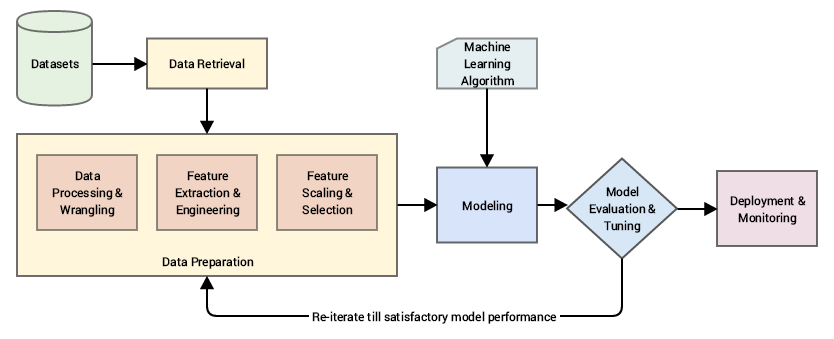

In this step, there are 4 topics to consider and handle to prepare the dataset.



1.   Outliers
2.   Missing Values
3.   Feature Extraction
4.   Encoding & Scaling

## Analyse outliers and missing values
 **Outlier:** Values that deviate considerably from the general trend in the data. Especially in linear problems, the effects of outliers are more severe. They have less impact on tree methods, but still, need to be considered.

## Method to determine outliers

The critical point is to determine the acceptable threshold value, which are up limit and low limit. After determining the threshold value, outliers are caught based on these values. Methods by which we can catch the threshold value:

* Industry knowledge
* Standard deviation approach
* Z-score approximation
* **Boxplot**(interquartile range-IQR) method (as univariate)
* **LOF Method** => Multivariate

Once we locate the outliers, they may be deleted, replaced with thresholds, etc.

In [4]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are two points that we have to consider:
* "Insulin" has high standar deviation, the quartile values are large, and the outlier is clear.
* "SckinThickness" quartile distribution is uneven.

<Axes: xlabel='Insulin'>

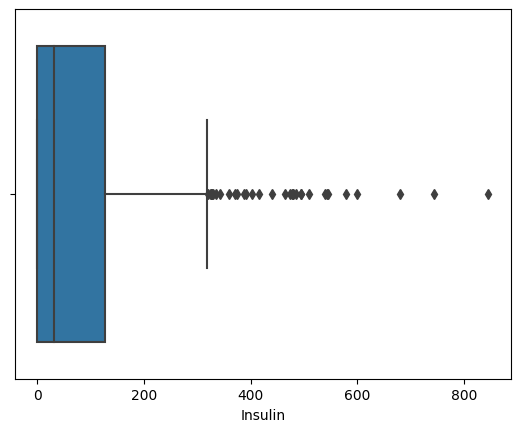

In [5]:
sns.boxplot(x=diabetes["Insulin"])

<Axes: xlabel='SkinThickness'>

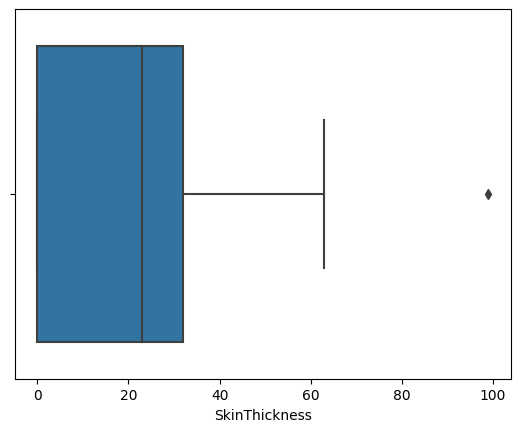

In [6]:
sns.boxplot(x=diabetes["SkinThickness"])

The critical point in the outlier is define the threshold. We will be using IQR method.

We set up a "fence" outside of Q1 and Q3. Any values that fall outside of the fence are considered outliers.

$$IQR = Q_3-Q_1$$

* $Q_3$: 75% quantile
* $Q_1$: 25% quantile

Up limit is defined as 1.5 times bigger than $Q_3$, and the low limit is define as 1.5 times smaller value than $Q_1$.


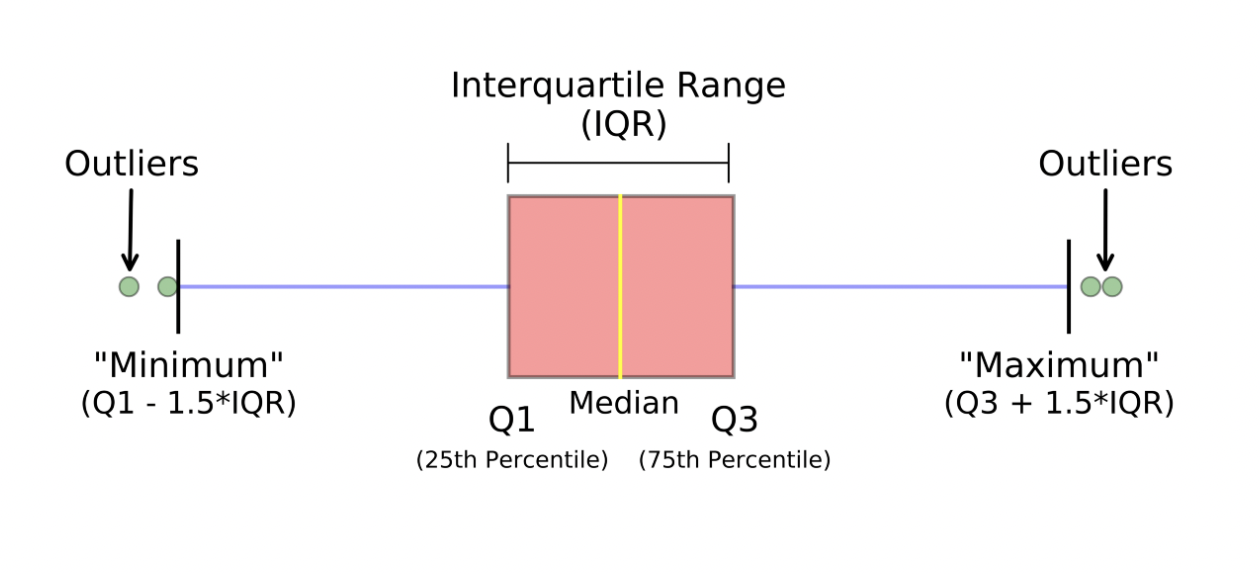

In [7]:
diabetes.describe()['Pregnancies']['25%']

1.0

In [8]:
def outlier_thresholds(df, col_name):
  data_qtles = df.describe()
  q1 = data_qtles[col_name]['25%']
  q3 = data_qtles[col_name]['75%']
  IQR = q3 - q1
  up_limit = q3 + 1.5*IQR
  low_limit = q1 - 1.5*IQR
  return low_limit, up_limit

In [9]:
for i in diabetes.columns:
    print("Thresholds of {} : ({:.2f}, {:.2f})".format(i, *outlier_thresholds(diabetes,i)))

Thresholds of Pregnancies : (-6.50, 13.50)
Thresholds of Glucose : (37.12, 202.12)
Thresholds of BloodPressure : (35.00, 107.00)
Thresholds of SkinThickness : (-48.00, 80.00)
Thresholds of Insulin : (-190.88, 318.12)
Thresholds of BMI : (13.35, 50.55)
Thresholds of DiabetesPedigreeFunction : (-0.33, 1.20)
Thresholds of Age : (-1.50, 66.50)
Thresholds of Outcome : (-1.50, 2.50)


In [10]:
low, up = outlier_thresholds(diabetes, "Pregnancies")
diabetes[((diabetes["Pregnancies"] < low) | (diabetes["Pregnancies"] > up))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


# Missing values
* Deleting
* Value Assignment Methods(average, mode, median, etc)
* Predictive Methos (ML statistical methods, etc.)

In [11]:
num_cols = len(diabetes.columns)

In [12]:
num_cols_miss = [i for i in diabetes.columns if i != ("Pregnancies") and i != "Outcome"]
# prints:
# ['Glucose',
#  'BloodPressure',
#  'SkinThickness',
#  'Insulin',
#  'BMI',
#  'DiabetesPedigreeFunction',
#  'Age']
for i in num_cols_miss:
    diabetes[i] = diabetes.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)

In [13]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


### Analysis null values

In [14]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
!pip install missingno

In [16]:
import missingno as msno

<Axes: >

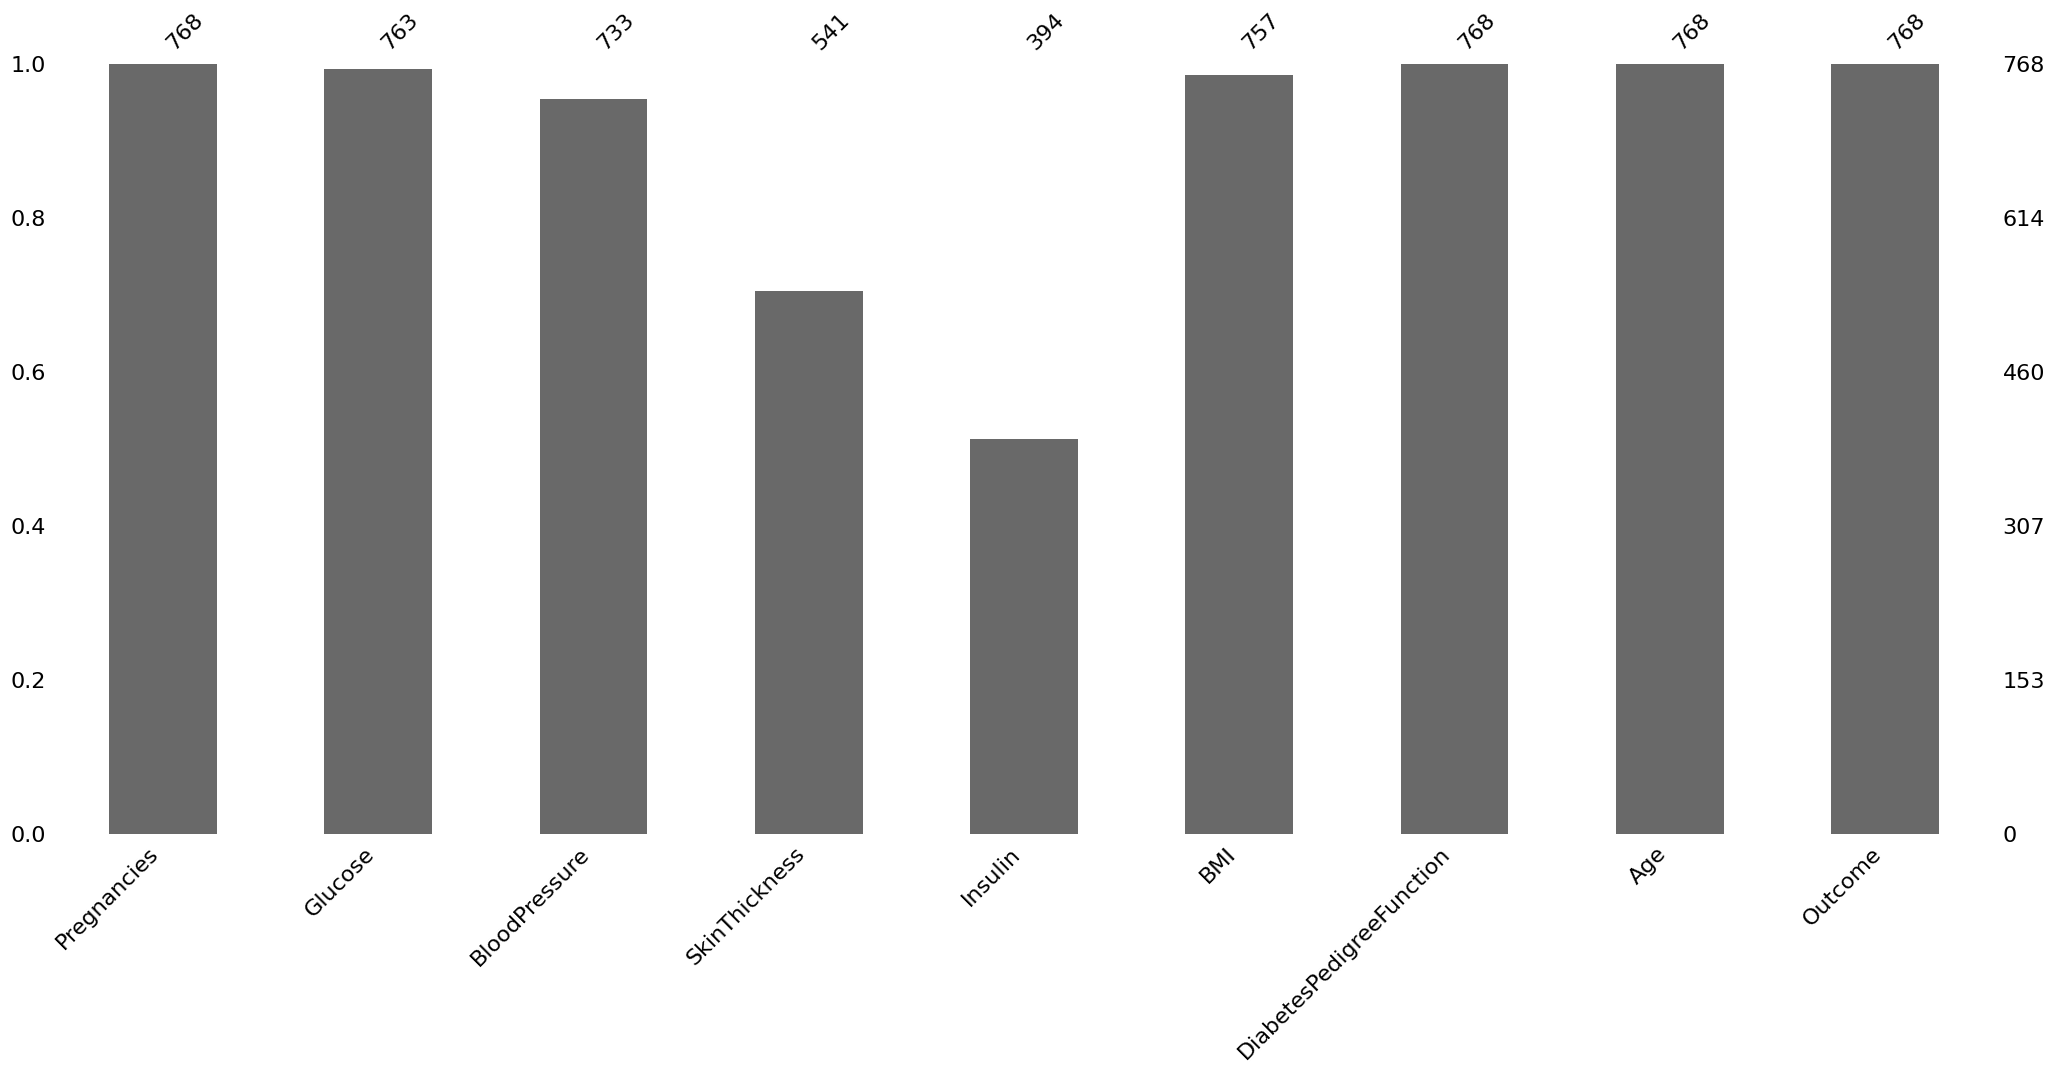

In [17]:
# the number of non-missing data
msno.bar(diabetes)

Missing data:
* y axis: indexes
* x axis: variable
* black: non-missing index
* while: missing index(NaN)

<Axes: >

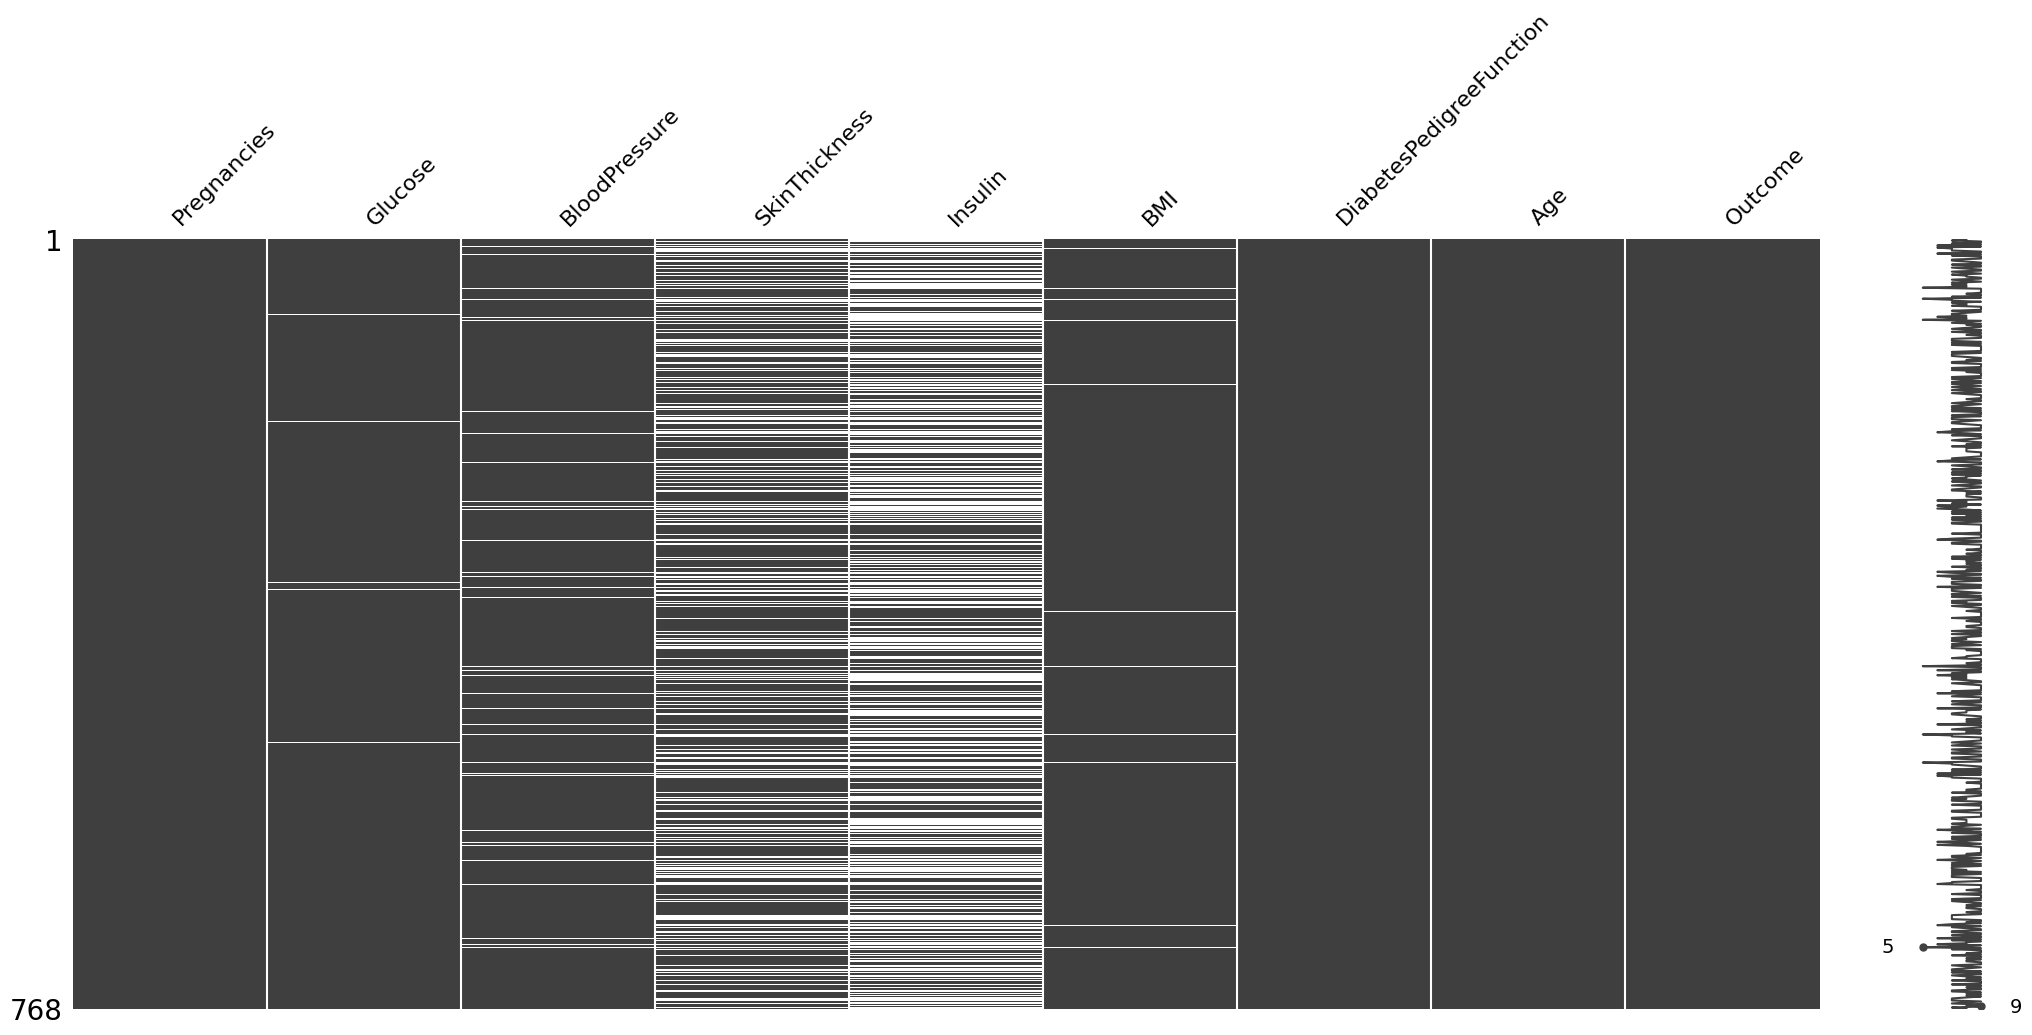

In [18]:
msno.matrix(diabetes)

Heatmap shows the correlation of missing values on variables.

<Axes: >

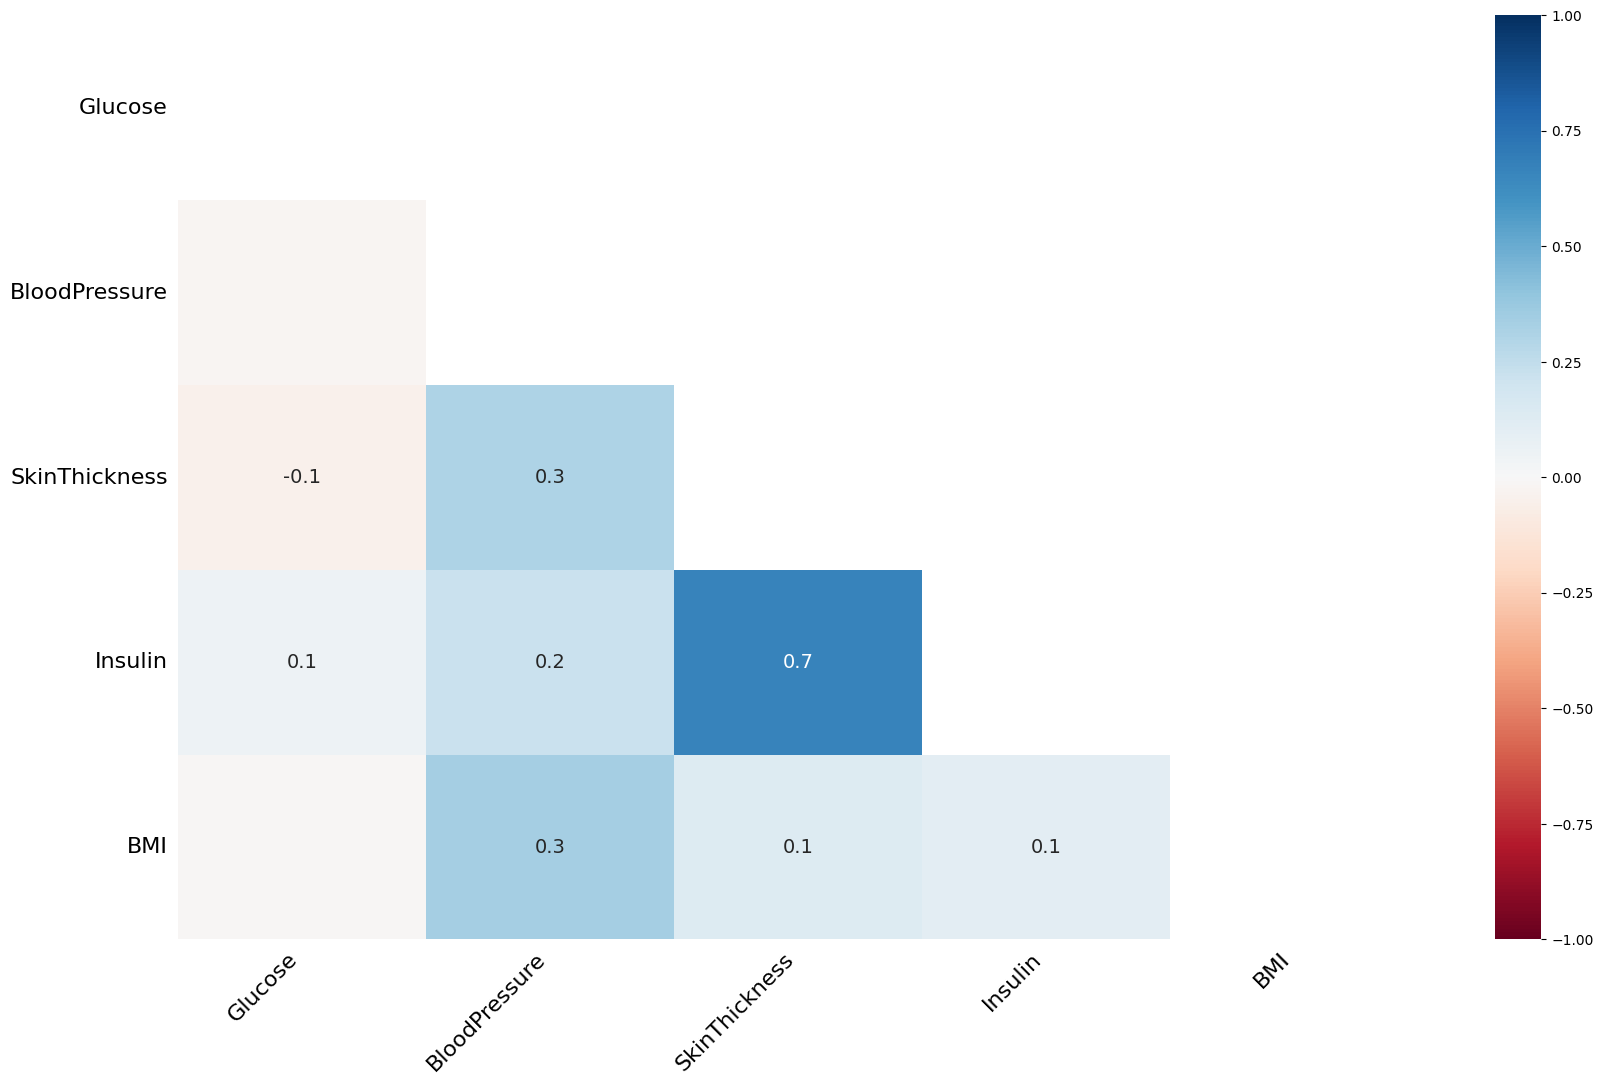

In [19]:
msno.heatmap(diabetes)

Notice the strong positive correlation between "SkinThickness" and "Insulin" both have many missing values

In [20]:
def missing_values_table(dataframe, na_name=False):
    # only take missing columns
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)  # number of missing value
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) # ratio
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])  # make table
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [21]:
na_cols = missing_values_table(diabetes, na_name=True)
diabetes[na_cols].isnull()

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,True,True,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
763,False,False,False,False,False
764,False,False,False,True,False
765,False,False,False,False,False
766,False,False,True,True,False


Lets create a table that relate the target variable and the missing data

In [22]:
def missing_target(df, target, na_col):
  df_temp = df.copy()
  for col in na_cols:
    df_temp[col + '_NA_FLAG'] = np.where(df_temp[col].isnull(),1,0)
  na_flags = df_temp.loc[:, df_temp.columns.str.contains("_NA_")].columns
  print("COLUMNS CONTAINING N.A :", na_flags)
  for col in na_flags:
        print(df_temp.groupby(col)[target].sum().head())

        print(pd.DataFrame(
              {
                "TARGET_MEAN": df_temp.groupby(col)[target].mean(),
                "Count": df_temp.groupby(col)[target].count()
              }
            ), end="\n\n\n")

In [23]:
missing_target(diabetes,"Outcome",na_cols)

COLUMNS CONTAINING N.A : Index(['Glucose_NA_FLAG', 'BloodPressure_NA_FLAG', 'SkinThickness_NA_FLAG',
       'Insulin_NA_FLAG', 'BMI_NA_FLAG'],
      dtype='object')
Glucose_NA_FLAG
0    266
1      2
Name: Outcome, dtype: int64
                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


BloodPressure_NA_FLAG
0    252
1     16
Name: Outcome, dtype: int64
                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


SkinThickness_NA_FLAG
0    180
1     88
Name: Outcome, dtype: int64
                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227


Insulin_NA_FLAG
0    130
1    138
Name: Outcome, dtype: int64
                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                

Lets observe Glucose, there are 763 non-missing values and 5 missing values. The mean Outcome for non/missing values is 0.349 and the mean of Outcome for missing values is 0.4.


In [24]:
corr_matrix = diabetes.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.494650
BMI                         0.313680
Insulin                     0.303454
SkinThickness               0.259491
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.170589
Name: Outcome, dtype: float64

# Pre-processing (Solve Outliers and Missing Values)

## Missing Values:
* Deleting: remove rows of missing data
```
df.dropna(inplace=True)
```

* Assign Values: Fill the Nan values with mean, median or mode, even in some instances we may fill with zero.
```
 X[col_name] = X[col_name].fillna(X[col_name].median())
```

* Predective Methods: Based on ML models, or statistical methods.
Before we have to consider:
  * Transform categorical data to one hot encoder.
  * KNN is a distance - base algorithm, we need to standarize the variables.


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
df_ml = diabetes.copy()

# standardization
scaler = MinMaxScaler()
df_ml = pd.DataFrame(scaler.fit_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,NaN,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,NaN,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,NaN,NaN,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [27]:
# fill Nan with KNN algorithm

In [28]:
from sklearn.impute import KNNImputer

In [29]:
imputer = KNNImputer(n_neighbors=5)
df_ml = pd.DataFrame(imputer.fit_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.384856,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.050721,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.273913,0.269231,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


 Reverse the transformed data

In [30]:
df_ml = pd.DataFrame(scaler.inverse_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,334.2,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,56.2,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.2,238.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


What to choose?

For this problem, since two variables have many missing values, making a prediction may not be logical for these.

We can decide what columns use the *predictive method*, and the remain columns use the *assign method*.

In [31]:
diabetes = pd.read_csv('diabetes.csv')

In [32]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
diabetes_data = diabetes.copy(deep = True)
#Replace the zero values to Nan, it is easy to count the null values
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [34]:
na_cols = missing_values_table(diabetes_data, na_name=True) # columns that includes missing values
n_miss = diabetes_data[na_cols].isnull().sum() # number of missing values on variables

# 100 as a threshold, it is open to comment
na_cols_ml = [i for i in n_miss.index if n_miss[i] < 100]
na_cols_med = [i for i in n_miss.index if n_miss[i] > 100]
print("Columns that will be applied ML model:", na_cols_ml)
print("Columns that will be filled with median:", na_cols_med)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65
Columns that will be applied ML model: ['Glucose', 'BloodPressure', 'BMI']
Columns that will be filled with median: ['SkinThickness', 'Insulin']


In [35]:
medians = diabetes_data.median()
medians

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [36]:
for cols in na_cols_med:
  diabetes_data[cols] = diabetes_data[cols].fillna(medians[cols])

In [37]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [38]:
scaler = MinMaxScaler()
diabetes_data[na_cols_ml] = pd.DataFrame(scaler.fit_transform(diabetes_data[na_cols_ml]), columns=diabetes_data[na_cols_ml].columns)
print(diabetes_data[na_cols_ml].head())

    Glucose  BloodPressure       BMI
0  0.670968       0.489796  0.314928
1  0.264516       0.428571  0.171779
2  0.896774       0.408163  0.104294
3  0.290323       0.428571  0.202454
4  0.600000       0.163265  0.509202


In [39]:
imputer = KNNImputer(n_neighbors=5)
diabetes_data[na_cols_ml] = pd.DataFrame(imputer.fit_transform(diabetes_data[na_cols_ml]), columns=diabetes_data[na_cols_ml].columns)
print(diabetes_data[na_cols_ml].head())

    Glucose  BloodPressure       BMI
0  0.670968       0.489796  0.314928
1  0.264516       0.428571  0.171779
2  0.896774       0.408163  0.104294
3  0.290323       0.428571  0.202454
4  0.600000       0.163265  0.509202


In [40]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [41]:
diabetes_data[na_cols_ml] = pd.DataFrame(scaler.inverse_transform(diabetes_data[na_cols_ml]), columns=diabetes_data[na_cols_ml].columns)
print(diabetes_data[na_cols_ml].head())

   Glucose  BloodPressure   BMI
0    148.0           72.0  33.6
1     85.0           66.0  26.6
2    183.0           64.0  23.3
3     89.0           66.0  28.1
4    137.0           40.0  43.1


In [42]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.674219,30.445229,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.408073,12.203100,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455703,6.883265,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [43]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Outliers
  * Local Outlier Factor (LOF): Helps to define outliers accordingly by ordering the observations based on the density at their location. <br>
  
  The local density of a point mean the neigborhoods around that point. <br>
  
  If a point is significantly less dense than its neigbors, then that point is in a more sparce region, so there may be an outlier. The LOF method allows us to calculate a distance score based on neighborhoods. <br>


  LOF computes the local density deviation of a given data point with respect to its neighbors



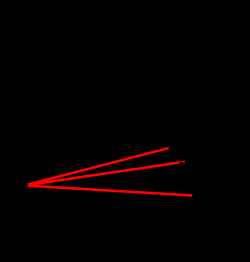

LOF methods provides a score, the closer the score to 1, the better. If the score is away from 1, the probability of the observation being outlier increases. The LOF method is also used to compute thresholds.

### Example
 We have "Age" and "Pregnancies" variables, if you observe the data separately, may not be any outlier. But analyze together and you may find strange data.



 ### IMAGINE AN EXAMPLE OF A POSSIBLE OUTLIER:
 *15 year old woman with 5 children*




In [44]:
from sklearn.neighbors import LocalOutlierFactor

In [46]:
### Example
clf = LocalOutlierFactor(n_neighbors=20)

```negative_outlier_factor``` - The opposite LOF of the training samples. The higher, the more normal.  Inliers tend to have a LOF score close to 1, but neg_outlier_factor is close to -1

In [47]:
clf.fit_predict(diabetes_data)  # returns LOF scores
df_scores = clf.negative_outlier_factor_ # keep scores to observe (negative)

In [48]:
len(df_scores)

768

In [97]:
df_scores

array([-1.01906445, -0.99409969, -1.0618044 , -0.99163597, -1.27904191,
       -0.97128896, -1.1089918 , -1.00348171, -1.24064769, -1.14063425,
       -1.09671075, -0.97663031, -1.04008144, -2.59693313, -1.0857331 ,
       -0.99648909, -1.0650121 , -0.98194987, -1.49632425, -1.01805197,
       -1.05772178, -1.03248834, -1.07503642, -1.05006159, -1.26345491,
       -1.06208584, -0.99975993, -1.34854894, -1.19852736, -1.0769009 ,
       -1.05181828, -1.04146486, -0.96641051, -1.37325491, -1.01483629,
       -1.01362057, -0.99102249, -1.01821415, -1.11858711, -1.07268205,
       -1.78813655, -1.00065524, -1.22336943, -1.15637862, -1.01233728,
       -1.06042246, -1.08879832, -1.09531828, -1.03605961, -0.95651573,
       -1.07354912, -1.09754763, -1.13968333, -0.9984802 , -1.04953709,
       -1.49226736, -1.00510327, -1.62979205, -1.01863976, -1.46433427,
       -1.05151976, -0.99980038, -1.6458485 , -1.12121517, -1.01712843,
       -0.99894573, -1.09123479, -1.14060708, -1.011944  , -1.51

In [49]:
print(df_scores[0:5])
print(np.sort(df_scores)[0:5])

[-1.01906445 -0.99409969 -1.0618044  -0.99163597 -1.27904191]
[-2.80654993 -2.59693313 -2.4153327  -2.02249122 -1.99003552]


The ```negative_outlier_factor``` method gives scores as negative. Therefore, if the scores are close to -1, the result becomes not an outlier, not being close to -1 leads to outlier. For example, scores from -1 to -10, values close to -10 tend to be more outlier.

<Axes: >

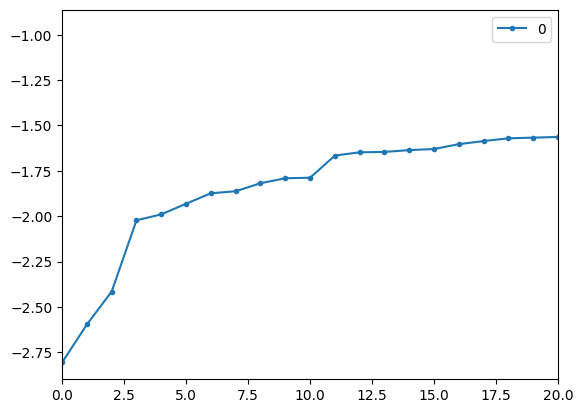

In [50]:
# elbow method
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')

In [54]:
th = np.sort(df_scores)[3]
th

-2.0224912163725586

In [55]:
diabetes_data[df_scores < th]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
579,2,197.0,70.0,99.0,125.0,34.7,0.575,62,1


In [56]:
diabetes_data.describe([0.01, 0.05, 0.25, 0.50, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,1.00000,3.0000,6.00000,9.0000,13.00000,17.00
Glucose,768.0,121.674219,30.445229,44.000,67.67000,80.00000,99.75000,117.0000,140.25000,167.0000,196.00000,199.00
BloodPressure,768.0,72.408073,12.203100,24.000,44.00000,52.00000,64.00000,72.0000,80.00000,88.0000,106.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,10.00000,14.35000,25.00000,29.0000,32.00000,40.0000,51.33000,99.00
Insulin,768.0,140.671875,86.383060,14.000,24.34000,50.00000,121.50000,125.0000,127.25000,210.0000,519.90000,846.00
BMI,768.0,32.455703,6.883265,18.200,19.50000,22.23500,27.50000,32.3000,36.60000,41.5000,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.14035,0.24375,0.3725,0.62625,0.8786,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,24.00000,29.0000,41.00000,51.0000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00


For instance, for the 13th index, while SkinThickness is close to 25% quantile, Insulin is max. On the 445th index, maybe when Glucose and BMI are close to high values, but Insuline is minimum, and this kind of combination may not be possible.


Being close(or be exactly) to max or min values are not obligatory. These are just comments without any industry knowledge, maybe these are wrong but these kinds of comments have to be done for understanding the data.


There is just 3 observation on the data set, so they can be deleted.

In [57]:
print("Before delete outliers:", diabetes_data.shape)
print(diabetes_data[df_scores < th].index) # indexes of outliers, just for observation
diabetes_data.drop(axis=0, labels=diabetes_data[df_scores < th].index, inplace=True)
print("After delete outliers:", diabetes_data.shape)

Before delete outliers: (768, 9)
Index([13, 445, 579], dtype='int64')
After delete outliers: (765, 9)


* IQR method: we have already compute the thresholds.
We can also use quantiles as 5 and 95, because deleting or filling according to 25-75 percentile would create a serious data loss and residue.
The proportion of these depends on the problem and dataset

In [58]:
# take the computed threshold and re-assign the outliers
def replace_with_thresholds(df, variable):
    low_limit, up_limit = outlier_thresholds(df, variable)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

In [60]:
# before reasignment
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.0,3.856209,3.371070,0.000,1.000,3.00,6.000,17.000
Glucose,765.0,121.411503,30.210433,44.000,99.000,117.00,140.000,199.000
BloodPressure,765.0,72.420131,12.216801,24.000,64.000,72.00,80.000,122.000
SkinThickness,765.0,28.980392,8.344254,7.000,25.000,29.00,32.000,60.000
Insulin,765.0,139.935948,82.573035,15.000,122.000,125.00,127.000,744.000
BMI,765.0,32.420627,6.826423,18.200,27.500,32.30,36.600,67.100
DiabetesPedigreeFunction,765.0,0.469292,0.324368,0.078,0.243,0.37,0.626,2.329
Age,765.0,33.180392,11.696260,21.000,24.000,29.00,41.000,81.000
Outcome,765.0,0.346405,0.476135,0.000,0.000,0.00,1.000,1.000


In [61]:
num_cols

9

In [62]:
num_cols = []
for col in diabetes_data.columns:
  if col != 'Outcome':
    num_cols.append(col)
print(num_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [63]:
for col in num_cols:
    replace_with_thresholds(diabetes_data, col)

In [64]:
# after reasignment
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.0,3.848366,3.345586,0.000,1.000,3.00,6.000,13.5000
Glucose,765.0,121.411503,30.210433,44.000,99.000,117.00,140.000,199.0000
BloodPressure,765.0,72.391373,11.819820,40.000,64.000,72.00,80.000,104.0000
SkinThickness,765.0,28.838562,7.421166,14.500,25.000,29.00,32.000,42.5000
Insulin,765.0,124.745098,6.918495,114.500,122.000,125.00,127.000,134.5000
BMI,765.0,32.370497,6.656560,18.200,27.500,32.30,36.600,50.2500
DiabetesPedigreeFunction,765.0,0.457892,0.284904,0.078,0.243,0.37,0.626,1.2005
Age,765.0,33.139216,11.562964,21.000,24.000,29.00,41.000,66.5000
Outcome,765.0,0.346405,0.476135,0.000,0.000,0.00,1.000,1.0000


# Feature Extraction
Once the data is prepared, we may try with new combinations of our valiables, it canbe done by mathematical operations, some times a numerical value with a categorical variable. Sometime is usefull transform the numerical data into categories or ranges

In [93]:
diabetes_data["Pregnancies"] = diabetes_data["Pregnancies"].apply(lambda x: int(x))

Lets propose 3 categories for the number of pregnancies.
* [0,2] -> "Normal"
* [3,6]->"Above Normal"
* [6,more] -> "Extreme"

Lets propose 3 categories for age.

* [18,25]->"Young"
* [26,40] -> "Mature"
* [40,more]->"Old"

Lets propose 3 categories for levels of glucose.

* [0,69]->"Low"
* [70,100] -> "Normal"
* [101,125]->"Medium"
* [126,more]->"High"

In [94]:
diabetes_data["NumOfPreg"] = pd.cut(diabetes_data["Pregnancies"], bins=[-1, 3, 6, diabetes_data["Pregnancies"].max()], labels=["Normal", "Above Normal","Extreme"])
diabetes_data["AgeGroup"] = pd.cut(diabetes_data["Age"], bins=[18, 25, 40, diabetes_data["Age"].max()], labels=["Young", "Mature", "Old"])
diabetes_data["GlucoseLevel"] = pd.cut(diabetes_data["Glucose"], bins=[diabetes_data["Glucose"].min(), 69,100, 125, diabetes_data["Glucose"].max()], labels=["Low", "Normal","Medium", "High"])

ValueError: bins must increase monotonically.

In [91]:
# Calculate Insulin Sensitivity
diabetes_data['Insulin_Sensitivity'] = diabetes_data['Glucose'] / (diabetes_data['Insulin'] * diabetes_data['BMI'])

# Glucose Category Trends
diabetes_data['Glucose_Trend'] = np.where(diabetes_data['Glucose'].diff() > 0, 'Increasing',
                                          np.where(diabetes_data['Glucose'].diff() < 0, 'Decreasing', 'Stable'))


New numerical column

In [92]:
diabetes_data["BMIns"] = diabetes_data["BMI"]*diabetes_data["Insulin"] # numerical
diabetes_data["BMInsGroup"] = pd.qcut(diabetes_data["BMIns"], 3, labels=["Low", "Medium", "High"]) # categorical

ValueError: Bin edges must be unique: array([-4.14230769,  0.        ,  0.        ,  3.7478022 ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [88]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Sensitivity,...,BMIns,NumOfPreg_Above Normal,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseLevel_Normal,GlucoseLevel_Medium,GlucoseLevel_High,BMInsGroup_Medium,BMInsGroup_High
0,6,0.756098,0.000,0.857143,0.0,0.142857,0.671018,1.235294,1,0.471849,...,0.160032,True,False,False,True,False,False,True,True,False
1,1,-0.780488,-0.375,0.000000,0.0,-0.626374,-0.049608,0.117647,0,-0.380373,...,-0.540108,False,False,True,False,True,False,False,False,False
2,8,1.609756,-0.500,0.000000,0.0,-0.989011,0.788512,0.176471,1,2.902716,...,-0.870174,False,True,True,False,False,False,True,False,False
3,1,-0.682927,-0.375,-0.857143,-2.1,-0.461538,-0.530026,-0.470588,0,-0.195577,...,-0.626165,False,False,False,False,True,False,False,False,False
4,0,0.487805,-2.000,0.857143,1.9,1.186813,2.168407,0.235294,1,-0.550461,...,1.437848,False,False,True,False,False,False,True,False,True


In [70]:
new_cat_columns = []
for cols in diabetes_data.columns:
  #print(diabetes_data[cols])
  if diabetes_data[cols].dtype.name =='category':
    new_cat_columns.append(cols)
print(new_cat_columns)

['NumOfPreg', 'AgeGroup', 'GlucoseLevel', 'BMInsGroup']


In [71]:
new_num_data = []
for cols in diabetes_data.columns:
  #print(diabetes_data[cols])
  if diabetes_data[cols].dtype.name =='float64':
    new_num_data.append(cols)
print(new_num_data)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_Sensitivity', 'BMIns']


In [72]:
df_scale = diabetes_data.copy()

# Scale Data

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [74]:
# standart scaler
ss = StandardScaler()
df_scale["Age_standard_scaler"] = ss.fit_transform(df_scale[["Age"]])
df_scale.head()

# robust scaler
rs = RobustScaler()
df_scale["Age_robuts_scaler"] = rs.fit_transform(df_scale[["Age"]])

# min-max scaler
# The range can be given with the feature_range=() argument
mms = MinMaxScaler() # default range from 0 to 1
df_scale["Age_min_max_scaler"] = mms.fit_transform(df_scale[["Age"]])

df_scale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NumOfPreg,AgeGroup,GlucoseLevel,Insulin_Sensitivity,Glucose_Trend,BMIns,BMInsGroup,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,6,148.0,72.0,35.0,125.0,33.6,0.6270,50.0,1,Above Normal,Old,High,0.035238,Stable,4200.00,Medium,1.459126,1.235294,0.637363
1,1,85.0,66.0,29.0,125.0,26.6,0.3510,31.0,0,Normal,Mature,Normal,0.025564,Decreasing,3325.00,Low,-0.185127,0.117647,0.219780
2,8,183.0,64.0,29.0,125.0,23.3,0.6720,32.0,1,Extreme,Mature,High,0.062833,Increasing,2912.50,Low,-0.098587,0.176471,0.241758
3,1,89.0,66.0,23.0,114.5,28.1,0.1670,21.0,0,Normal,Young,Normal,0.027662,Decreasing,3217.45,Low,-1.050523,-0.470588,0.000000
4,0,137.0,40.0,35.0,134.5,43.1,1.2005,33.0,1,Normal,Mature,High,0.023633,Increasing,5796.95,High,-0.012048,0.235294,0.263736


The choosen scaler must apply to all numerical data, the selection of scaler may depend of the algorithm to select or as an hyperparameter of the model design.

In [75]:
rs = RobustScaler()
for i in new_num_data:
    diabetes_data[i] = rs.fit_transform(diabetes_data[[i]])
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NumOfPreg,AgeGroup,GlucoseLevel,Insulin_Sensitivity,Glucose_Trend,BMIns,BMInsGroup
0,6,0.756098,0.000,0.857143,0.0,0.142857,0.671018,1.235294,1,Above Normal,Old,High,0.471849,Stable,0.160032,Medium
1,1,-0.780488,-0.375,0.000000,0.0,-0.626374,-0.049608,0.117647,0,Normal,Mature,Normal,-0.380373,Decreasing,-0.540108,Low
2,8,1.609756,-0.500,0.000000,0.0,-0.989011,0.788512,0.176471,1,Extreme,Mature,High,2.902716,Increasing,-0.870174,Low
3,1,-0.682927,-0.375,-0.857143,-2.1,-0.461538,-0.530026,-0.470588,0,Normal,Young,Normal,-0.195577,Decreasing,-0.626165,Low
4,0,0.487805,-2.000,0.857143,1.9,1.186813,2.168407,0.235294,1,Normal,Mature,High,-0.550461,Increasing,1.437848,High


In [76]:
diabetes_data= pd.get_dummies(diabetes_data, columns=new_cat_columns, drop_first=True)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Sensitivity,...,BMIns,NumOfPreg_Above Normal,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseLevel_Normal,GlucoseLevel_Medium,GlucoseLevel_High,BMInsGroup_Medium,BMInsGroup_High
0,6,0.756098,0.000,0.857143,0.0,0.142857,0.671018,1.235294,1,0.471849,...,0.160032,True,False,False,True,False,False,True,True,False
1,1,-0.780488,-0.375,0.000000,0.0,-0.626374,-0.049608,0.117647,0,-0.380373,...,-0.540108,False,False,True,False,True,False,False,False,False
2,8,1.609756,-0.500,0.000000,0.0,-0.989011,0.788512,0.176471,1,2.902716,...,-0.870174,False,True,True,False,False,False,True,False,False
3,1,-0.682927,-0.375,-0.857143,-2.1,-0.461538,-0.530026,-0.470588,0,-0.195577,...,-0.626165,False,False,False,False,True,False,False,False,False
4,0,0.487805,-2.000,0.857143,1.9,1.186813,2.168407,0.235294,1,-0.550461,...,1.437848,False,False,True,False,False,False,True,False,True


# Train Model


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
y = diabetes_data["Outcome"]

In [79]:
X = diabetes_data.drop(["Outcome"], axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

ValueError: could not convert string to float: 'Decreasing'